In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = {'Year' : ['2013','2014','2015','2016','2017','2018','2019','2020'],
        'Transaction Value':  ['0.74', '1.4','2.1','3.3','4.7','6.8','9.1','38.95'],
        'Number of Platform':['22','78','140','200','254','300','324','400'],
        'Demanded Product' : ['Fashion dan Alat Elektronik','Fashion','Fashion','Fashion,Kosmetik dan Kebutuhan sehari-hari','Fashion dan Tiket Murah','Fashion, Kecantikan dan Travel','Fashion,Gadget dan Travel','Gadget,Fashion,Kecantikan,Popok Bayi, Alat Elektronik']
        }

df = pd.DataFrame (data, columns = ['Year','Transaction Value','Number of Platform','Demanded Product'])

df

,Year,Transaction Value,Number of Platform,Demanded Product
0,2013,0.74,22,Fashion dan Alat Elektronik
1,2014,1.4,78,Fashion
2,2015,2.1,140,Fashion
3,2016,3.3,200,"Fashion,Kosmetik dan Kebutuhan sehari-hari"
4,2017,4.7,254,Fashion dan Tiket Murah
5,2018,6.8,300,"Fashion, Kecantikan dan Travel"
6,2019,9.1,324,"Fashion,Gadget dan Travel"
7,2020,38.95,400,"Gadget,Fashion,Kecantikan,Popok Bayi, Alat Ele..."


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Demanded Product'] = encoder.fit_transform(df['Demanded Product'])
df

,Year,Transaction Value,Number of Platform,Demanded Product
0,2013,0.74,22,1
1,2014,1.4,78,0
2,2015,2.1,140,0
3,2016,3.3,200,5
4,2017,4.7,254,2
5,2018,6.8,300,3
6,2019,9.1,324,4
7,2020,38.95,400,6


In [4]:
def Missing_Values(data):
    variabel_name =[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
      variabel_name.append(col)
      data_type.append(data[col].dtype)
      total_value.append(data[col].shape[0])
      total_missing_value.append(data[col].isnull().sum())
      unique_value_list.append(data[col].unique())
      total_unique_value.append(len(data[col].unique()))
      missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],3))

    missing_data = pd.DataFrame({"Variabel":variabel_name,"Total_value": total_value,
                                "Total missing value": total_missing_value,"Missing Value":missing_value_rate,
                                 "Data_type": data_type,"Unique_value":unique_value_list,
                                 "total_unique_value":total_unique_value})
    return missing_data.sort_values("Missing Value", ascending=False)

In [5]:
Missing_Values(df)

,Variabel,Total_value,Total missing value,Missing Value,Data_type,Unique_value,total_unique_value
0,Year,8,0,0.0,object,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]",8
1,Transaction Value,8,0,0.0,object,"[0.74, 1.4, 2.1, 3.3, 4.7, 6.8, 9.1, 38.95]",8
2,Number of Platform,8,0,0.0,object,"[22, 78, 140, 200, 254, 300, 324, 400]",8
3,Demanded Product,8,0,0.0,int64,"[1, 0, 5, 2, 3, 4, 6]",7


In [6]:
df["Number of Platform"] = df["Number of Platform"].astype(str).astype(int)
df["Transaction Value"] = df["Transaction Value"].astype(str).astype(float)

In [8]:
df.isnull().sum()

Year                  0
Transaction Value     0
Number of Platform    0
Demanded Product      0
dtype: int64

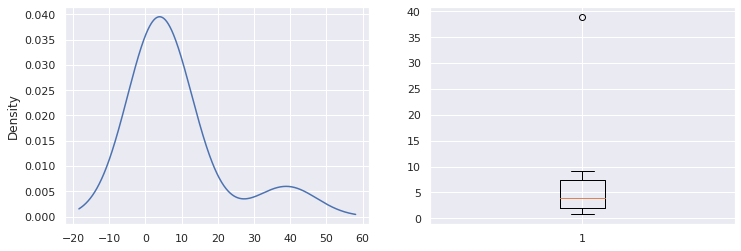

In [9]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Transaction Value'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Transaction Value'])
plt.show()

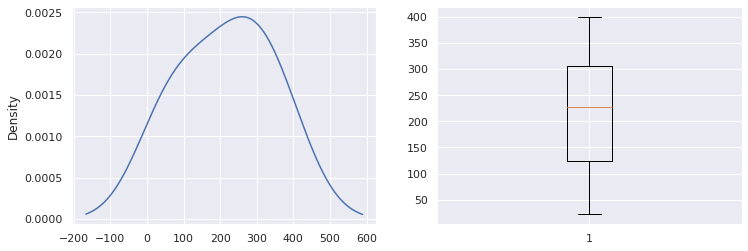

In [10]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Number of Platform'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Number of Platform'])
plt.show()

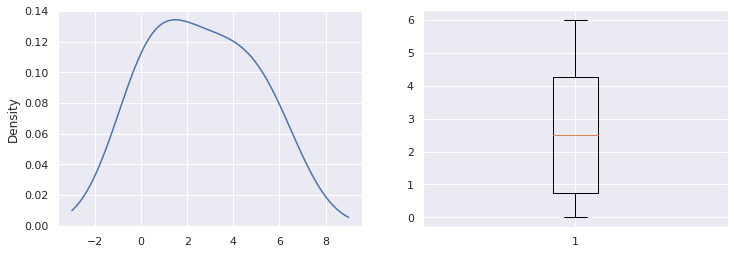

In [11]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Demanded Product'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Demanded Product'])
plt.show()

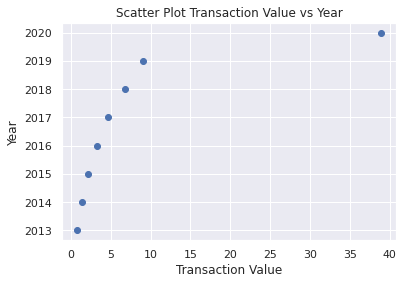

In [12]:
#Bivariate analysis horsepower dan price.
#Menggunakan scatter plot.
plt.scatter(df['Transaction Value'], df['Year'])
plt.xlabel('Transaction Value')
plt.ylabel('Year')
plt.title('Scatter Plot Transaction Value vs Year')
plt.show()

In [13]:
#Mengetahui nilai korelasi dari Demanded product dan Number of platform.
#Nilai korelasinya adalah 0.78 termasuk kategori cukup tinggi.
df.corr()

,Transaction Value,Number of Platform,Demanded Product
Transaction Value,1.000000,0.736541,0.702492
Number of Platform,0.736541,1.000000,0.789843
Demanded Product,0.702492,0.789843,1.000000


In [14]:
# Tahapan selanjutnya adalah modeling
x = df['Year']
y = df[['Transaction Value', 'Number of Platform','Demanded Product']]

In [15]:
y_train_new = np.array(y)
x_train_new = np.array(x).reshape(-1,1)
print(x_train_new.shape)
print(y_train_new.shape)

(8, 1)
(8, 3)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(x_train_new, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[ 3.82702381]
 [52.5       ]
 [ 0.72619048]]
[  -7708.8072619  -105651.5          -1461.73809524]


In [20]:
x_test = x_test.values.reshape(-1,1)
lin_reg.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9942839760524317

In [21]:
lin_reg.predict([[2021]])

array([[ 25.60785714, 451.        ,   5.89285714]])

In [22]:

# # menentukan algoritma model
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression()

In [23]:
# x = df.drop(['Transaction Value', 'Number of Platform','Demanded Product'],axis =1)
# y= df[['Transaction Value', 'Number of Platform','Demanded Product']]

In [24]:
# reg.fit(x,y)

In [25]:
# x_new = np.array([2021]).reshape(-1,1)

In [26]:
# reg.predict(x_new)